In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn import metrics


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Cristian-Fontes/HouseSalePrice/main/house_price.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

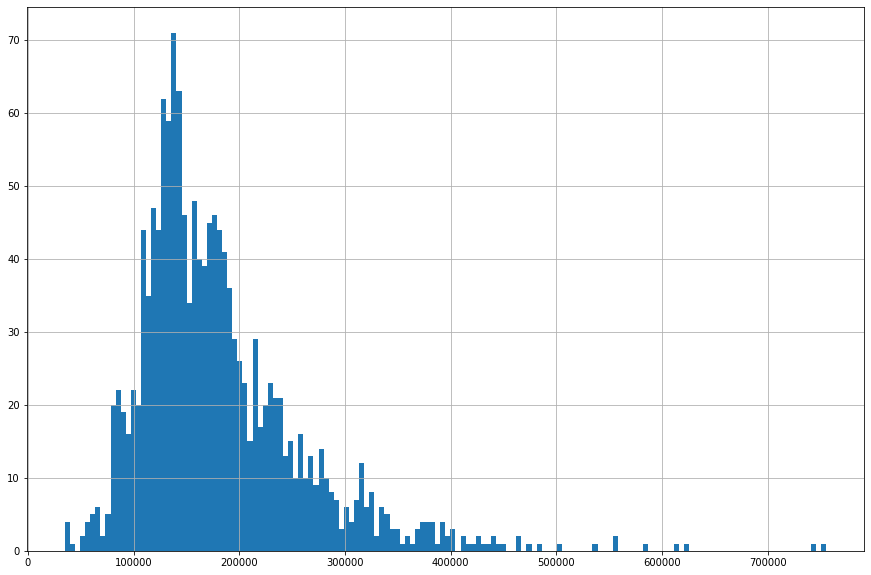

In [ ]:
plt.figure(figsize=(15,10))
df['SalePrice'].hist(bins=150);


In [ ]:
#En la gráfica anterior podemos ver cómo la distribución está sesgada a la derecha y que hay varios valores de precios de casas que tiene cierta frecuencia aún en valores elevados.

In [ ]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
pd.set_option('max_rows', 90)

In [ ]:
df.drop(columns='SalePrice').isnull().sum()*100/len(df.index)>=85

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF   

In [ ]:
df[df['PoolArea']!=0].PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [ ]:
df[df['PoolArea']!=0].PoolArea.value_counts()

512    1
648    1
576    1
555    1
480    1
519    1
738    1
Name: PoolArea, dtype: int64

In [ ]:
#Eliminar porque tienen más del 85% de datos nulos: Alley, PoolQC, MiscFeature. Alley podría ser una característica muy específica y por eso presenta tantos nulos
#MiscFeature son características muy específicas.
#PoolQC se mantiene ya que tiene relación con la cantidad en la que PoolArea es 0.
df.drop(columns=['Alley','MiscFeature'],inplace=True)

In [ ]:
df.drop(columns='SalePrice').isnull().sum()*100/len(df.index)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [ ]:
#Revisamos qué información sacamos al ver las características de garage con nulos y las que no tienen nulos, ya que tienen el mismo % de nulos y está curioso.
df.loc[df['GarageType'].isnull(),['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].head(10)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
99,NaN,NaN,NaN,0,0,NaN,NaN
108,NaN,NaN,NaN,0,0,NaN,NaN
125,NaN,NaN,NaN,0,0,NaN,NaN
127,NaN,NaN,NaN,0,0,NaN,NaN
140,NaN,NaN,NaN,0,0,NaN,NaN


In [ ]:
df.loc[~df['Fence'].isnull(),'Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [ ]:
df.loc[df['FireplaceQu'].isnull(),['FireplaceQu','Fireplaces']]

,FireplaceQu,Fireplaces
0,NaN,0
5,NaN,0
10,NaN,0
12,NaN,0
15,NaN,0
...,...,...
1452,NaN,0
1453,NaN,0
1454,NaN,0
1458,NaN,0


In [ ]:
pd.set_option('max_columns', 90)

In [ ]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
df[df['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,0,5,2008,WD,Normal,167500


In [ ]:
df.loc[df['BsmtExposure'].isnull(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF
17,NaN,NaN,NaN,NaN,0,NaN,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0


In [ ]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [ ]:
df['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [ ]:
df.loc[df['MasVnrType'].isnull(),['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [ ]:
pd.set_option('max_rows', 90)
df[df['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,Grav,Fa,N,FuseF,952,0,0,952,0,0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1,192,Fa,Po,P,0,98,

In [ ]:
#El tratamiento de los valores nulos de PoolQC será como valor None.
#El tratamiendo de los valores nulos de 'GarageType','GarageYrBlt','GarageFinish','GarageQual' y 'GarageCond' es lo mismo que PoolQC
#Mismo tratamiento para Fence, FireplaceQu,
#El tratamiento de 'Electrical' será poner la moda debido a que no logré identificar qué significaba cada valor. Sin embargo, el nulo no significa que no tenga valor intencionalmente
#esto lo podemos observar porque la casa tiene aire acondicionado, entonces, la casa si tiene sistema eléctrico. Se usará la moda en el registro 1379. (hecho)
# BsmtQual,BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 mismo tratamiento con los nulos.
#Hay una observación 332 en BsmtFinType2 y otra en BsmtExposure 948 que podrían ser realmente un error. Este dato se podría sustituir por la moda. (hecho)
#MasVnrType y MasVnrArea se imputará la moda en nulos. Esta característica tiene pocos nulos. Esta característica tiene más del 50% de sus valores en 0 o None, entonces por eso se utilizará la moda.
#LotFrontage tomaremos la media como medida de tendencia central.

In [ ]:
fts = ['PoolQC','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','Fence','FireplaceQu','Electrical','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType','MasVnrArea','LotFrontage']

In [ ]:
#Excepciones caso BsmtFinType2 índice 332 y BsmtExposure índice 948, sustituir por moda.

In [ ]:
print(df['BsmtFinType2'].mode())
print(df['BsmtExposure'].mode())


0    Unf
dtype: object
0    No
dtype: object


In [ ]:
df['BsmtFinType2'].iloc[332] = 'Unf'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df['BsmtExposure'].iloc[948]='No'

In [ ]:
print(df['BsmtFinType2'].iloc[332])
print(df['BsmtExposure'].iloc[948])

Unf
No


In [ ]:
#Nulo en electrical

In [ ]:
df['Electrical'].mode()

0    SBrkr
dtype: object

In [ ]:
df['Electrical'].iloc[1379] = 'SBrkr'

In [ ]:
df[fts].dtypes

PoolQC           object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
Fence            object
FireplaceQu      object
Electrical       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
MasVnrType       object
MasVnrArea      float64
LotFrontage     float64
dtype: object

In [ ]:
#Variables categóricas con nulos y tratamiento igual a None
cat_null_non = ['PoolQC','GarageType','GarageFinish','GarageQual','GarageCond','Fence','FireplaceQu','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
imp_cat_null_non = SimpleImputer(strategy='constant',fill_value='None')
df[cat_null_non] = imp_cat_null_non.fit_transform(df[cat_null_non])

In [ ]:
#Variables categóricas con nulos y tratamiento con moda
cat_null_mod = 'MasVnrType'
df[cat_null_mod]=np.where(df[cat_null_mod].isnull(),df[cat_null_mod].mode(),df[cat_null_mod])

In [ ]:
num_null_0 = 'GarageYrBlt'
df[num_null_0]=np.where(df[num_null_0].isnull(),0,df[num_null_0])

In [ ]:
#Variables numéricas con nulos y tratamiendo con moda
num_null_mod = 'MasVnrArea'
df[num_null_mod]=np.where(df[num_null_mod].isnull(),df[num_null_mod].mode(),df[num_null_mod])

In [ ]:
#Variables numéricas con nulos y tratamiento con media
num_null_mean = 'LotFrontage'
df[num_null_mean]=np.where(df[num_null_mean].isnull(),df[num_null_mean].mean(),df[num_null_mean])

In [ ]:
#One hot encoding

In [ ]:
categoricas = df.select_dtypes('object').columns

In [ ]:
ohe = pd.get_dummies(df[categoricas],drop_first=True)
print(ohe.shape)
ohe.head()

(1460, 217)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,...,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
df=df.drop(columns=categoricas)
df=pd.concat([df, ohe], axis=1)
df.shape

(1460, 255)

In [ ]:
#Selección de variables

In [ ]:
corr_y = df.corr()['SalePrice']
corr_y.sort_values(ascending = False)

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
                      ...   
GarageFinish_Unf   -0.410608
BsmtQual_TA        -0.452394
FireplaceQu_None   -0.471908
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, Length: 255, dtype: float64

In [ ]:
corr_y.abs().describe()

count    255.000000
mean       0.149661
std        0.161671
min        0.000076
25%        0.037757
50%        0.092529
75%        0.220053
max        1.000000
Name: SalePrice, dtype: float64

In [ ]:
corr_y.abs().quantile(0.80) #Tomar el 80% de los datos

0.2433167025942533

In [ ]:
len(corr_y)

255

In [ ]:
len(corr_y[corr_y.abs()>=0.2433167025942533])

51

In [ ]:
no_relevantes = list(corr_y[corr_y.abs()<0.24].index)
df = df.drop(no_relevantes, axis=1)
df.shape

(1460, 54)

In [ ]:
df.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_Reg',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'HouseStyle_2Story',
       'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'MasVnrType_None',
       'MasVnrType_Stone', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_No',
       'BsmtFinType1_GLQ', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_SBrkr',
       'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_Gd',
       'FireplaceQu_None', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageFinish_Unf', 'GarageQual_TA', 'GarageCond_TA', 'SaleType_New',
       'SaleType_WD', 'SaleCondition

In [ ]:
corr = df.drop(columns='SalePrice').corr()

In [ ]:
#Identificar variables redundantes

# Triangulo superior de la matriz de correlación en números absolutos
celda_sobre_diagonal_ppal = np.triu(np.ones_like(corr),1).astype(bool)
triangulo_sup = corr.where(celda_sobre_diagonal_ppal).abs()


# Encontrar las columnas donde la correlación es alta
redundantes = [column for column in triangulo_sup.columns
          if any(triangulo_sup[column] >= 0.7)]
redundantes

['1stFlrSF',
 'TotRmsAbvGrd',
 'GarageArea',
 'MSZoning_RM',
 'HouseStyle_2Story',
 'Exterior2nd_VinylSd',
 'ExterQual_TA',
 'Foundation_PConc',
 'KitchenQual_TA',
 'FireplaceQu_None',
 'GarageType_Detchd',
 'GarageQual_TA',
 'GarageCond_TA',
 'SaleType_WD',
 'SaleCondition_Partial']

In [ ]:
df = df.drop(columns=redundantes)

In [ ]:
target= 'SalePrice'
y = df[target]
X = df.drop(columns=target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=42)

In [ ]:
model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)

20725.683806126417

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

20725.683806126417

In [ ]:
errores = y_test - y_pred
errores

892      1137.128146
1105    -1500.418658
413     -6004.655912
522    -10104.715718
1036    17876.683752
            ...     
988     11178.277923
243    -17416.540001
1342    -7235.695016
1057   -30018.457537
1418    15349.446327
Name: SalePrice, Length: 365, dtype: float64

In [ ]:
media = np.mean(y_test-y_pred)
desvest = np.sqrt(np.var(y_test-y_pred))
media,desvest

(2307.163269155573, 31514.36061269109)

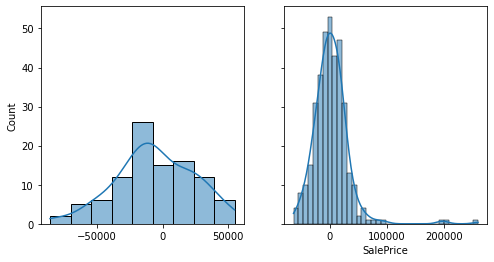

In [ ]:
errores_teoricos = np.random.normal(media, desvest,100)

# Comparamos las gráficas de ambas distribuciones

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey='all')
for dat, subplot in zip((errores_teoricos, errores), ax.flatten()):
  sns.histplot(x=dat, ax=subplot, kde=True, )

plt.show()

In [ ]:
hr = HuberRegressor(epsilon=1.4,   max_iter=1000,  alpha=0,  warm_start=False,
                    fit_intercept=True, tol=1e-05)
hr = hr.fit(X_train, y_train)
y_pred = hr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 20712.831506510298


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
#En conclusión, se selecciona el modelo huber, debido a la ligera distribución de laplace que se puede ver con los valores extremos que tienen cierta frecuencia.
#El modelo no mejora mucho al aplicar huber en cuanto al error.